<a href="https://colab.research.google.com/github/NyanSwanAung/TensorFlow-Beginner/blob/main/coding-exercise/week4/mini_project2_image_classification_with_CIFAR10(answer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<figure>
<center>
<img src='https://raw.githubusercontent.com/alexsnowschool/TensorFlow-Beginner/main/project_img.png' width = '800px'/>
</center>        
</figure>

# Image Classification with CIFAR10 Dataset


The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.
There are 50000 training images and 10000 test images.

<figure>
<center>
<img src='https://raw.githubusercontent.com/NyanSwanAung/TensorFlow-Beginner/main/coding-exercise/week4/CIFAR10%20Dataset.png' width = '800px'/>
</center>        
</figure>

# Step 1: Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)

print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.3.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? True


# Step 2: Preprocess Data

Total = 50000 images

X_Train = (15000, 32, 32, 3), Y_train = (15000, 3)

X_Test = (3000, 32, 32, 3), Y_test = (3000, 3)


### One-hot encoding 

After this encoding, every label will be converted to a list with 3 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| Aeroplane : 0 | [1, 0, 0] |
| Car : 1 | [0, 1, 0] |
| Bird : 2 | [0, 0, 1] |

In [ ]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.) # aeroplance
    indices_1, _ = np.where(y == 1.) # car
    indices_2, _ = np.where(y == 2.) # bird

    print('Len of X:', len(x))
    print('Len of label:', np.unique(y))
    print('Indices 0:', indices_0, 'Indices 1:', indices_1, 'Indices 2:', indices_2)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    print('Concantenated Indices:', indices)
    
    x = x[indices]
    y = y[indices]
    print('X:', x, 'Y:', y)

    count = x.shape[0] # number total images of label 0,1,2 --> 15000
    print('Shape of X:', x.shape)
    print('Range of count:', range(count))

    indices = np.random.choice(range(count), count, replace=False) # ([0, 15000], 15000, )
    
    x = x[indices]
    y = y[indices]

    print('Random X:', x)
    print('Random Y:', y)
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
Len of X: 50000
Len of label: [0 1 2 3 4 5 6 7 8 9]
Indices 0: [   29    30    35 ... 49941 49992 49994] Indices 1: [    4     5    32 ... 49993 49998 49999] Indices 2: [    6    13    18 ... 49987 49991 49995]
Concantenated Indices: [   29    30    35 ... 49987 49991 49995]
X: [[[[202 204 199]
   [202 204 199]
   [204 206 201]
   ...
   [207 208 200]
   [205 206 199]
   [203 204 198]]

  [[206 208 203]
   [206 208 203]
   [207 209 204]
   ...
   [210 211 205]
   [208 209 203]
   [206 207 201]]

  [[210 212 207]
   [211 213 208]
   [212 214 210]
   ...
   [214 214 210]
   [212 213 208]
   [210 211 206]]

  ...

  [[218 217 222]
   [210 209 214]
   [194 194 198]
   ...
   [243 242 247]
   [244 242 247]
   [243 243 247]]

  [[219 218 223]
   [217 216 221]
   [216 216 220]
   ...
   [241 240 245]
   [241 240 245]
   [241 240 245]]

  [[217 216 221]
   [216 215 220]
   [217 216 221]
   ...
   [239 238 243]
   [239 238 243]


# Step 3: Visualize Examples

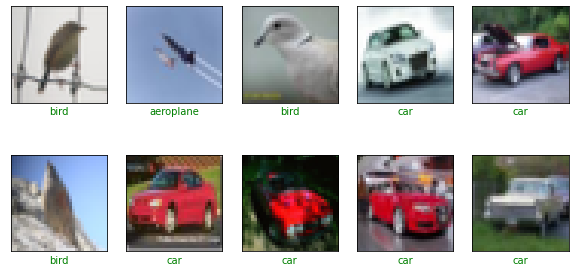

In [ ]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    

    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, 1 + i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color = col)

    plt.show()

show_random_examples(x_train, y_train, y_train)
       

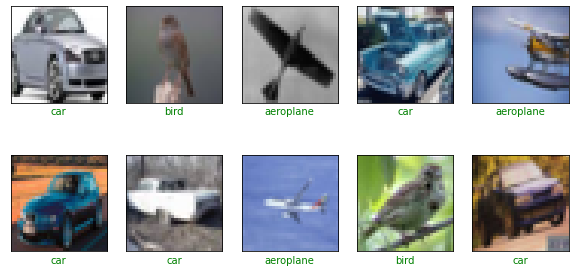

In [ ]:
show_random_examples(x_test, y_test, y_test)

# Step 4: Create Model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=2),
        

        Conv2D(64, (3,3), activation ='relu', padding = 'same'),
        MaxPooling2D(pool_size=2),
        

        Conv2D(128, (3,3), activation ='relu', padding = 'same'),
        MaxPooling2D(pool_size=2),
        

        Flatten(),
        Dense(128, activation='relu'),
        Dense(3, activation='softmax')
])

model.compile(
        loss='categorical_crossentropy',
        optimizer='adam', metrics=['accuracy']
    )

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

# Step 5: Train the Model

In [ ]:
history = model.fit(
    x_train/255., y_train,
    validation_data=(x_test/255., y_test),
    epochs=20, batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
        tf.keras.callbacks.ModelCheckpoint(
            'models/model_{val_accuracy:.3f}.h5',
             save_best_only=True,
             save_weights_only=False,
             monitor='val_accuracy'
        )
    ]
)

Epoch 1/20
118/118 [==============================] - 1s 10ms/step - loss: 0.6654 - accuracy: 0.7194 - val_loss: 0.5273 - val_accuracy: 0.7857
Epoch 2/20
118/118 [==============================] - 1s 7ms/step - loss: 0.4043 - accuracy: 0.8377 - val_loss: 0.3442 - val_accuracy: 0.8600
Epoch 3/20
118/118 [==============================] - 1s 7ms/step - loss: 0.3310 - accuracy: 0.8706 - val_loss: 0.3313 - val_accuracy: 0.8713
Epoch 4/20
118/118 [==============================] - 1s 7ms/step - loss: 0.2972 - accuracy: 0.8863 - val_loss: 0.3184 - val_accuracy: 0.8733
Epoch 5/20
118/118 [==============================] - 1s 7ms/step - loss: 0.2657 - accuracy: 0.8961 - val_loss: 0.3053 - val_accuracy: 0.8830
Epoch 6/20
118/118 [==============================] - 1s 7ms/step - loss: 0.2246 - accuracy: 0.9147 - val_loss: 0.2802 - val_accuracy: 0.8913
Epoch 7/20
118/118 [==============================] - 1s 7ms/step - loss: 0.2000 - accuracy: 0.9251 - val_loss: 0.2592 - val_accuracy: 0.9070
Epoch

# Step 6: Final Predictions

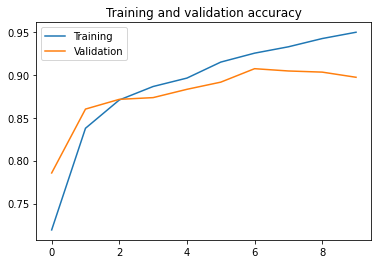

In [ ]:
accs = history.history['accuracy']
val_accs = history.history['val_accuracy']
epochs = range(len(accs))

plt.plot(epochs, accs, label='Training')
plt.plot(epochs, val_accs, label='Validation')
plt.legend()
plt.title('Training and validation accuracy')
plt.show()

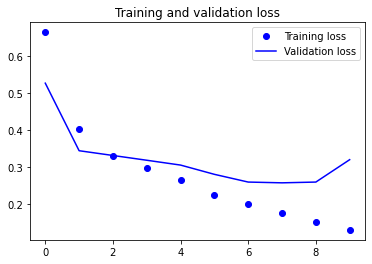

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model = tf.keras.models.load_model('models/model_0.907.h5')

In [ ]:
pred = model.predict(x_test/255.)

In [ ]:
show_random_examples(x_test, y_test, pred)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for file_name in uploaded.keys():
 
  # predicting images
  path = '/content/' + file_name
  img = image.load_img(path, target_size=(32, 32))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print()
  print('Classes[0]:', classes[0])

# aeroplane, # car, # bird

  if classes[0][0].astype('int') == 1:
    print(file_name, ' is an', 'aeroplane')
  elif classes[0][1].astype('int') == 1:
    print(file_name, ' is a', 'car')
  elif classes[0][2].astype('int') == 1:
    print(file_name, ' is a', 'bird')

 

Saving a1.jpeg to a1 (1).jpeg
Saving a2.jpg to a2 (1).jpg
Saving b1.jpg to b1 (1).jpg
Saving b2.jpg to b2 (1).jpg
Saving c1.jpeg to c1 (1).jpeg
Saving c2.jpg to c2 (1).jpg

Classes[0]: [1. 0. 0.]
a1.jpeg  is an aeroplane

Classes[0]: [1. 0. 0.]
a2.jpg  is an aeroplane

Classes[0]: [1. 0. 0.]
b1.jpg  is an aeroplane

Classes[0]: [0. 0. 1.]
b2.jpg  is a bird

Classes[0]: [0. 1. 0.]
c1.jpeg  is a car

Classes[0]: [0. 1. 0.]
c2.jpg  is a car
